In [1]:
import pandas as pd
import gc
import sys
import os
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

src_path = os.path.abspath(r'C:\Users\User\OneDrive - Imperial College London\Desktop\Documents\GitHub\Credit-Card\src')
sys.path.append(src_path)

from feature_engineering.encoding import group_low_frequency_categories, encode_categories, log_encode
from data.db_functions import query_data
from data.clean_data import update_dtypes

gc.collect()

0

In [2]:
df = pd.read_csv(r'C:\Users\User\OneDrive - Imperial College London\Desktop\Documents\GitHub\Credit-Card\data\raw\New_Query_2024-09-07_10_51pm_2024_09_20.csv')
df.head()

,business_id,auth_status,eci,descriptor,auth_failure_reason,charge_failure_reason,amount,authorized_amount,mid_label,bank_merchant_id,...,country,currency,ip_address,masked_card_number,card_holder_name,card_type,is_blocked_by_fraud,is_cvn_submitted,should_authenticate_credit_card,should_settle_directly
0,5f990dcd1b1e373cc8c95e95,USED,5.0,XL PRIORITAS,NaN,NaN,166500.0,166500.0,XLAXIATA2DS_BCA_MPGS,001198763,...,INDONESIA,IDR,NaN,47264730XXXX1758,NaN,CREDIT,False,True,False,True
1,610cff461363cd43a57308f2,USED,5.0,BLIBLI-BLI-RETAIL-DESCRIPTOR,NaN,NaN,2089480.0,2089480.0,Blibli_BCA_PG,000005000933414,...,INDONESIA,IDR,139.0.131.136,18898015XXXX6004,IRFAN,CREDIT,False,True,True,True
2,610cff461363cd43a57308f2,USED,NaN,BLIBLI-BLI-DIGITAL-DESCRIPTOR,NaN,NaN,4892200.0,4892200.0,BLIBLI_BRI,001999145083,...,INDONESIA,IDR,114.10.99.29,55200233XXXX7003,Robi,CREDIT,False,True,False,True
3,5bfe0e8c97ad396f3b87d9d7,USED,5.0,PT GLOBAL TIKET NETWORK-xendit charge #1259139...,NaN,NaN,1639540.0,1639540.0,TIKET_3DS_ECOMM,tiket_3ds_ecomm,...,INDONESIA,IDR,110.137.194.152,41050509XXXX5844,NaN,CREDIT,False,True,False,True
4,5bfe0e8c97ad396f3b87d9d7,USED,NaN,PT GLOBAL TIKET NETWORK-xendit charge #1260880...,NaN,NaN,2131400.0,2131400.0,TIKET_3DS_ECOMM,tiket_3ds_ecomm,...,INDONESIA,IDR,182.2.4.194,54264000XXXX3978,NaN,CREDIT,False,True,False,True


In [3]:
df = update_dtypes(df)

df.dtypes

Total rows: 1000
Number of rows dropped: 0


business_id                              category
auth_status                              category
eci                                      category
descriptor                               category
auth_failure_reason                      category
charge_failure_reason                    category
amount                                    float32
authorized_amount                         float32
mid_label                                category
bank_merchant_id                         category
capture_amount                            float32
created                            datetime64[ns]
authentication_type                      category
card_bank                                category
card_brand                               category
card_expiration_month                        int8
card_expiration_year                        int16
cavv                                     category
country                                  category
currency                                 category


In [4]:
encoding_strategy = {
    "business_id": "frequency",
    "auth_status": "label",
    "eci": "label",
    "descriptor": "label",
    "auth_failure_reason": "label",
    "charge_failure_reason": "label",
    "mid_label": "label",
    "bank_merchant_id": "frequency",
    "authentication_type": "label",
    "card_bank": "label",
    "card_brand": "label",
    "cavv": "label",
    "country": "label",
    "currency": "label",
    "ip_address": "frequency or target",
    "card_holder_name": "frequency",
    "card_type": "label"
}

df = encode_categories(df)

In [5]:
columns = ['descriptor', 'mid_label', 'card_bank'] 
df = group_low_frequency_categories(df)

descriptor: 246 --> 27 unique categories
mid_label: 61 --> 8 unique categories
card_bank: 153 --> 17 unique categories


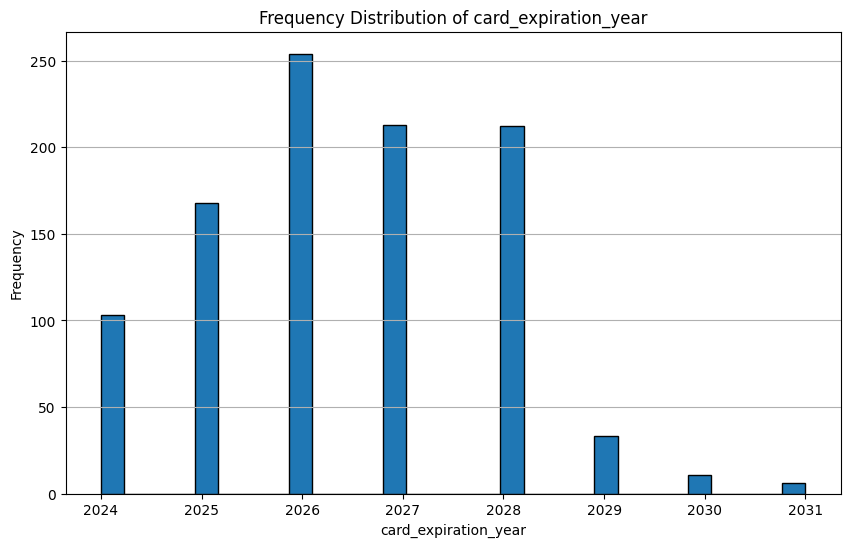

In [6]:
col = 'card_expiration_year'
plt.figure(figsize=(10, 6))
plt.hist(df[col], bins=30, edgecolor='black')
plt.title(f'Frequency Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [7]:
df = log_encode(df)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


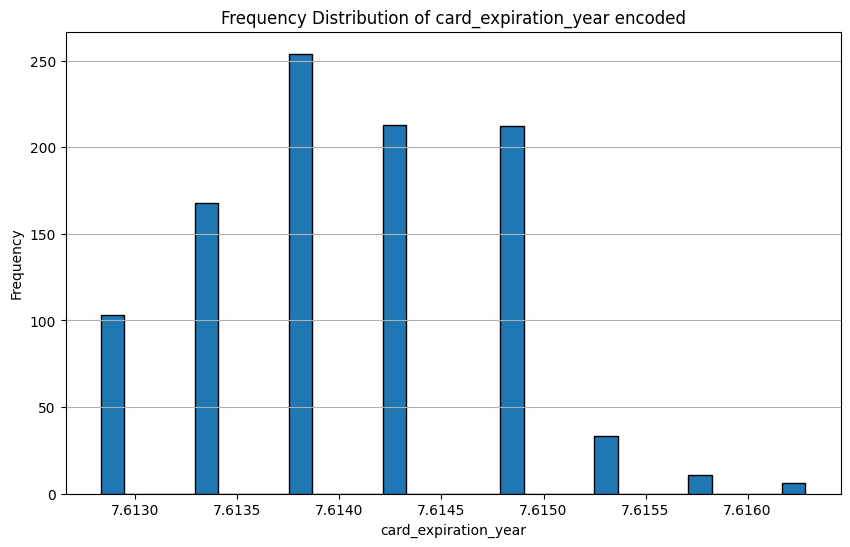

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df[col], bins=30, edgecolor='black')
plt.title(f'Frequency Distribution of {col} encoded')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()